In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Customizing Plot Legends

In [ ]:
plt.style.use('classic')

In [ ]:
x = np.linspace(0, 10, 1000)
fig, ax = plt.subplots()
ax.plot(x, np.sin(x), '-b', label='Sine')
ax.plot(x, np.cos(x), '--r', label='Cosine')
ax.axis('equal')
leg = ax.legend();

In [ ]:
# specify the location and turn off the frame
ax.legend(loc='upper left', frameon=False)
fig

In [ ]:
# use the ncol command to specify the number of columns in the legend
ax.legend(frameon=False, loc='lower center', ncol=2)
fig

In [ ]:
# a rounded box (fancybox), add a shadow, 
# change the transparency (alpha value) of the frame, 
# or change the padding around the text

In [ ]:
ax.legend(fancybox=True, framealpha=0.5, shadow=True, borderpad=0.5)
fig

## Choosing Elements for the legend

1. Previously, the legend includes all labeled elements by default.
2. We can fine-tune which elements and labels appear in legend by using the objects returned by plot commands.
3. The plt.plot() command is able to create multiple lines at once, and returns a list of created line instances.
4. Passing any of these to plt.legend() will tell it which to identify, along with the labels we'd like to specify.

In [ ]:
y = np.sin(x[:, np.newaxis] + np.pi * np.arange(0, 2, 0.5))
lines = plt.plot(x, y)

# lines is a list of plt.Line2D instances
plt.legend(lines[:2], ['first', 'second']);

In [ ]:
# cleaner
plt.plot(x, y[:, 0], label='first')
plt.plot(x, y[:, 1], label='second')
plt.plot(x, y[:, 2:])
plt.legend(framealpha=1, frameon=True);

## Legend for Size of Points

In [45]:
cities = pd.read_csv('california_cities.csv')

# Extract the data we're interested in
lat, lon = cities['latd'], cities['longd']
population, area = cities['population_total'], cities['area_total_km2']

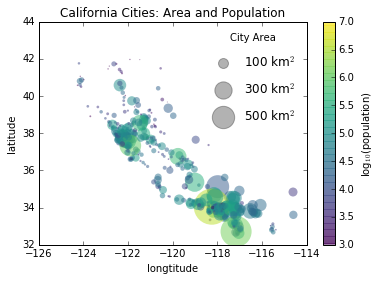

In [46]:
# Scatter the points, using size and color but no label
plt.scatter(lon, lat, label=None,
           c=np.log10(population), cmap='viridis',
           s=area, linewidth=0, alpha=0.5)
plt.axis(aspects='equal')
plt.xlabel('longtitude')
plt.ylabel('latitude')
plt.colorbar(label='log$_{10}$(population)')
plt.clim(3, 7)

# Here we create a legend:
# # we'll plot empty lists with the desired size and label
for area in [100, 300, 500]:
    plt.scatter([], [], c='k', alpha=0.3, s=area,
                label=str(area) + ' km$^2$')
plt.legend(scatterpoints=1, frameon=False, 
           labelspacing=1, title='City Area')

plt.title('California Cities: Area and Population');

## Multiple Legends
1. If you try to create a second legend using plt.legend() or ax.legend(), it will simply override the first one.
2. We can work around this by creating a new legend artist from scratch, and then using the lower-level ax.add_artist() method to manually add the second artist to the plot

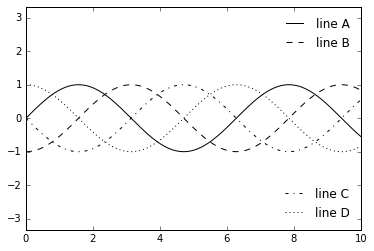

In [47]:
fig, ax = plt.subplots()

lines = []
styles = ['-', '--', '-.', ':']
x = np.linspace(0, 10, 1000)

for i in range(4):
    lines += ax.plot(x, np.sin(x - i * np.pi / 2), 
                     styles[i], color='black')

ax.axis('equal')

# specify the lines and labels of the first legend
ax.legend(lines[:2], ['line A', 'line B'], 
          loc='upper right', frameon=False)

# Create the second legend and add the artist manually.
from matplotlib.legend import Legend
leg = Legend(ax, lines[2:], ['line C', 'line D'], 
             loc='lower right', frameon=False)
ax.add_artist(leg);

# Customizing Colorbars

* Colorbar is a separate axes that can provide a key for the meaning of colors in a plot

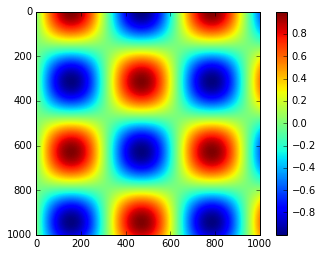

In [48]:
x = np.linspace(0, 10, 1000)
I = np.sin(x) * np.cos(x[:, np.newaxis])

plt.imshow(I)
plt.colorbar();

## Customizing Colorbars

### Choosing the colormap

__[Ten Simple Rules for Better Figures](https://journals.plos.org/ploscompbiol/article?id=10.1371/journal.pcbi.1003833)__

__[Choosing Colormaps](https://matplotlib.org/1.4.1/users/colormaps.html#ware)__

* Sequential colormaps
    * These consist of one continuous sequence of colors (e.g., binary or viridis).

* Divergent colormaps
    * These usually contain two distinct colors, which show positive and negative deviations from a mean (e.g., RdBu or PuOr).

* Qualitative colormaps
    * These mix colors with no particular sequence (e.g., rainbow or jet).

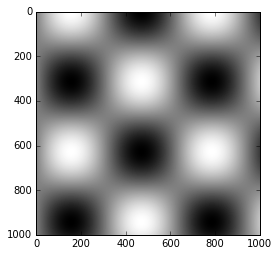

In [50]:
plt.imshow(I, cmap='gray');

In [77]:
from matplotlib.colors import LinearSegmentedColormap

def grayscale_cmap(cmap):
    """Return a grayscale version of the given colormap"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    # convert RGBA to perceived grayscale luminance
    # cf. http://alienryderflex.com/hsp.html
    RGB_weight = [0.299, 0.587, 0.114]
    luminance = np.sqrt(np.dot(colors[:, :3] ** 2, RGB_weight))
    colors[:, :3] = luminance[:, np.newaxis]
    return LinearSegmentedColormap.from_list(cmap.name + "_gray", colors, cmap.N)


def view_colormap(cmap):
    """Plot a colormap with its grayscale equivalent"""
    cmap = plt.cm.get_cmap(cmap)
    colors = cmap(np.arange(cmap.N))
    cmap = grayscale_cmap(cmap)
    grayscale = cmap(np.arange(cmap.N))
    fig, ax = plt.subplots(2, figsize=(6, 2),
                           subplot_kw=dict(xticks=[], yticks=[]))
    ax[0].imshow([colors], extent=[0, 10, 0, 1])
    ax[1].imshow([grayscale], extent=[0, 10, 0, 1])

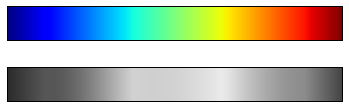

In [82]:
view_colormap('jet')
# uneven brightness: the eye will be drawn to certain portions 
# of the color range, which will potentially emphasize 
# unimportant parts of the dataset.

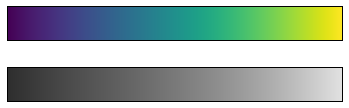

In [80]:
# even brightness variation across the range
view_colormap('viridis')

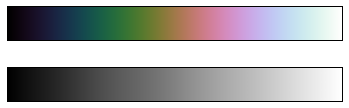

In [81]:
# a good option for rainbow schemes
view_colormap('cubehelix')

### Color limits and extensions

* narrow the color limits and indicate the out-of-bounds values with a triangular arrow at the top and bottom by setting the extend property.

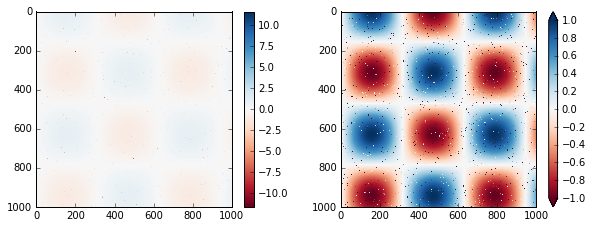

In [85]:
# make noise in 1% of the image pixels
speckles = (np.random.random(I.shape) < 0.01)
I[speckles] = np.random.normal(0, 3, np.count_nonzero(speckles))

plt.figure(figsize=(10, 3.5))

plt.subplot(1, 2, 1)
plt.imshow(I, cmap='RdBu')
plt.colorbar()

plt.subplot(1, 2, 2)
plt.imshow(I, cmap='RdBu')
plt.colorbar(extend='both')
plt.clim(-1, 1);

### Discrete colobars

* use the plt.cm.get_cmap() function, and pass the name of a suitable colormap along with the number of desired bins

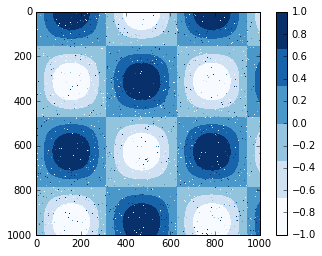

In [86]:
plt.imshow(I, cmap=plt.cm.get_cmap('Blues', 6))
plt.colorbar()
plt.clim(-1, 1);

In [91]:
# load images of the digits 0 through 5 and visualize several of them
from sklearn.datasets import load_digits
digits = load_digits(n_class=6)

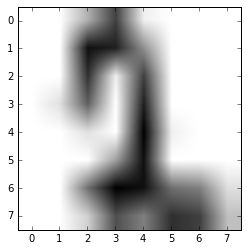

In [101]:
plt.imshow(digits.images[8], cmap='binary')

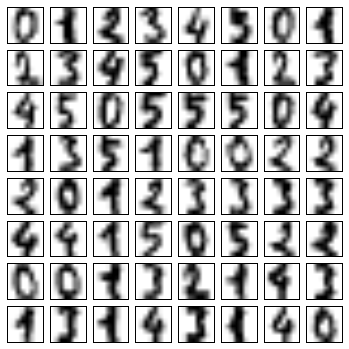

In [103]:
fig, ax = plt.subplots(8, 8, figsize=(6, 6))
for i, axi in enumerate(ax.flat):
    axi.imshow(digits.images[i], cmap='binary')
    axi.set(xticks=[], yticks=[])

In [106]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [107]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [108]:
# project the digits into 2 dimensions using IsoMap
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
projection = iso.fit_transform(digits.data)

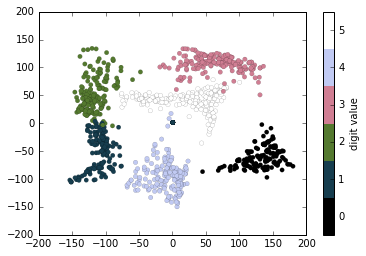

In [111]:
# plot the results
plt.scatter(projection[:, 0], projection[:, 1], lw=0.1, 
            c=digits.target, cmap=plt.cm.get_cmap('cubehelix', 6))
plt.colorbar(ticks=range(6), label='digit value')
plt.ylim(-200, 200)
plt.clim(-0.5, 5.5)

# Multiple Subplots

* Groups of smaller axes that can exist together within a single figure.
    1. Insets,
    2. Grids of plots
    3. Other more complicated layouts
    
## No.1: plt.axes, Subplots by Hand
1. plt.axes
    * this creates a standard axes object that fills the entire figure.
    * plt.axes also takes an optional argument that is a list of four numbers in the figure coordinate system. These numbers represent [left, bottom, width, height] in the figure coordinate system, which ranges from 0 at the bottom left of the figure to 1 at the top right of the figure.

2. fig.add_axes(): equivalent object-oriented interface


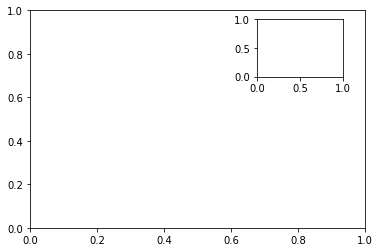

In [4]:
ax1 = plt.axes() #standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

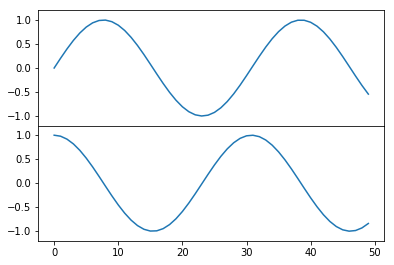

In [6]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                  xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                  ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

## No.2: plt.subplot, Simple Grids of Subplots

Signature: plt.subplot(*args, **kwargs)

Docstring: Return a subplot axes at the given grid position.

Call signature:: subplot(nrows, ncols, index, **kwargs)

In the current figure, create and return an `~.Axes`, at position *index*
of a (virtual) grid of *nrows* by *ncols* axes.  Indexes go from 1 to
``nrows * ncols``, incrementing in row-major order.

If *nrows*, *ncols* and *index* are all less than 10, they can also be
given as a single, concatenated, three-digit number.

For example, ``subplot(2, 3, 3)`` and ``subplot(233)`` both create an
`~.Axes` at the top right corner of the current figure, occupying half of
the figure height and a third of the figure width.

.. note::

   Creating a subplot will delete any pre-existing subplot that overlaps
   with it beyond sharing a boundary::

`"plot a line, implicitly creating a subplot(111)"
plt.plot([1,2,3])

"now create a subplot which represents the top plot of a grid"
"with 2 rows and 1 column. Since this subplot will overlap the"
"first, the plot (and its axes) previously created, will be removed"
plt.subplot(211)
plt.plot(range(12))

plt.subplot(212, facecolor='y') # creates 2nd subplot with yellow background`

   If you do not want this behavior, use the
   :meth:`~matplotlib.figure.Figure.add_subplot` method or the
   :func:`~matplotlib.pyplot.axes` function instead.

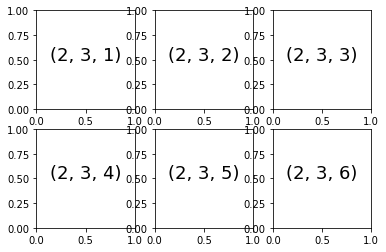

In [15]:
# creates a single subplot within a grid. 
# takes three integer arguments—the number of rows, the number of columns,
# and the index of the plot to be created in this scheme, 
# which runs from the upper left to the bottom right

for i in range(1, 7):
    plt.subplot(2, 3, i)#, xticklabels=[], yticklabels=[])
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center');

**plt.subplots_adjust** 
<img src='files/plt_subplots_adjust.PNG' width=600>

In [16]:
plt.subplots_adjust?

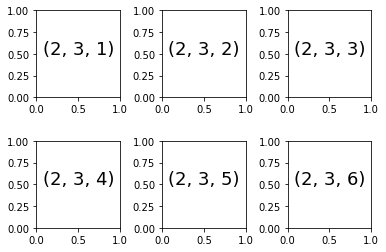

In [18]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.5, wspace=0.5)
for i in range(1, 7):
    plt.subplot(2, 3, i)#, xticklabels=[], yticklabels=[])
    plt.text(0.5, 0.5, str((2, 3, i)),
            fontsize=18, ha='center');

## No.3: plt.subplots, The Whole Grid in One Go

1. Creates a full grid of subplots in asingle line, returning them in NumPy array
2. Arguments are the nrow, ncol, along with optional keywords `sharex` and `sharey`
3. In comparison to plt.subplot(), plt.subplots() is more consistent with Python’s conventional 0-based indexing.

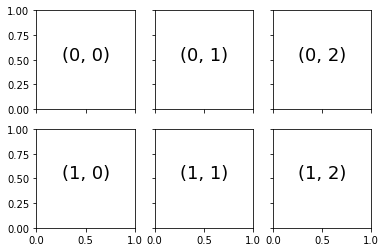

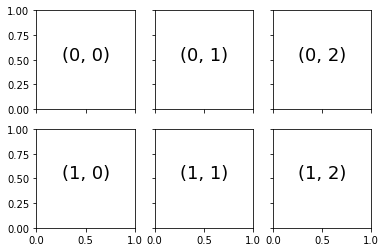

In [25]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

# sharex/sharey remove inner labels on the grid to make the plot cleaner
# The resulting grid of axes instances is returned within a NumPy array, 
# allowing for convenient specification of the desired axes 
# using standard array indexing notation

# axes are in a two-dimensional array, indexed by [row, col]
for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)), 
                      fontsize=18, ha='center')
fig

## No.4: plt.GridSpec: More Complicated Arrangements
1. Beyond a regular grid to subplots that span mulitple rows and columns
2. does not create a plot by itself
3. recognized by plt.subplot() command

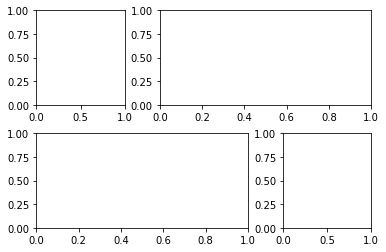

In [30]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)
plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2]);

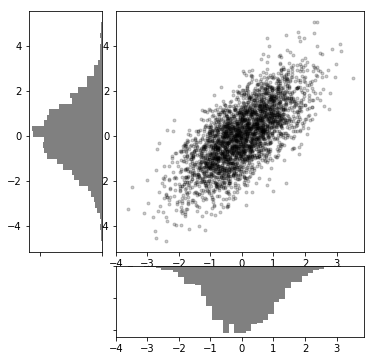

In [32]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()